# Proyek Analisis Data : E-Commerce Public Dataset
<ul>
<li>Nama : Ricky Ritonga</li>
<li>Email : ricky.beatus@gmail.com</li>
<li>Id Dicoding : Ricky Ritonga</li>
</ul>

# Menentukan Pertanyaan Bisnis

<ol>
    <li>Bagaimana performa penjualan dan revenue?</li>
    <li>Kategori apa yang paling banyak dan paling sedikit terjual?</li>
    <li>Metode transaksi yang paling banyak digunakan dan rata-rata payment value-nya?</li>
    <li>Hari apa yang paling sering transaksi?</li>
</ol>

# Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling
## Gathering Data

### customers_df

In [2]:
# Baca customer_dataset.csv dan tampung di variabel customers_df
customers_df = pd.read_csv('data/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### orders_df

In [3]:
# Baca orders_dataset.csv dan tampung di variabel orders_df
orders_df = pd.read_csv('data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### items_df

In [4]:
# Baca order_items_dataset.csv dan tampung di variabel items_df
items_df = pd.read_csv('data/order_items_dataset.csv')
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### payments_df

In [5]:
# Baca order_payments_dataset.csv dan tampung di variabel payments_df
payments_df = pd.read_csv('data/order_payments_dataset.csv')
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### products_df

In [6]:
# Baca products_dataset.csv dan tampung di variabel products_df
products_df = pd.read_csv('data/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### sellers_df

In [7]:
# Baca sellers_dataset.csv dan tampung di variabel sellers_df
sellers_df = pd.read_csv('data/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### translations_df

In [8]:
# Baca product_category_name_translation.csv dan tampung di variabel translation_df
translations_df = pd.read_csv('data/product_category_name_translation.csv')
translations_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


## Assessing Data

### customers_df

In [9]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [10]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


### orders_df

In [11]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [12]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [13]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [14]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


### items_df

In [15]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [16]:
print("Jumlah duplikasi: ", items_df.duplicated().sum())

Jumlah duplikasi:  0


In [17]:
items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


### payments_df

In [18]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [19]:
print("Jumlah duplikasi: ", payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [20]:
payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### products_df

In [21]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [22]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [23]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [24]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### sellers_df

In [25]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [26]:
sellers_df.duplicated().sum()

0

In [27]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### translations_df

In [28]:
translations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [29]:
print("Jumlah duplikasi: ", translations_df.duplicated().sum())

Jumlah duplikasi:  0


In [30]:
translations_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


## Cleaning Data

### customers_df

In [31]:
# menghapus field yang tidak dibutuhkan
customers_df = customers_df.drop(columns=["customer_unique_id", "customer_zip_code_prefix"])
customers_df.head()

,customer_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP


In [32]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     99441 non-null  object
 1   customer_city   99441 non-null  object
 2   customer_state  99441 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


In [33]:
customers_df.duplicated().sum()

0

### orders_df

In [34]:
# menghapus field yang tidak dibutuhkan
orders_df.drop(columns=["order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"], inplace=True)
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   order_id                  99441 non-null  object
 1   customer_id               99441 non-null  object
 2   order_status              99441 non-null  object
 3   order_purchase_timestamp  99441 non-null  object
dtypes: object(4)
memory usage: 3.0+ MB


In [35]:
# ubah tipe kolom jadi datetime
orders_df["order_purchase_timestamp"] = pd.to_datetime(orders_df["order_purchase_timestamp"])
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  99441 non-null  object        
 1   customer_id               99441 non-null  object        
 2   order_status              99441 non-null  object        
 3   order_purchase_timestamp  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ MB


In [36]:
orders_df.duplicated().sum()

0

### items_df

In [37]:
# menghapus field yang tidak dibutuhkan
items_df = items_df.drop(columns=["order_item_id", "shipping_limit_date", "freight_value"])
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   order_id    112650 non-null  object 
 1   product_id  112650 non-null  object 
 2   seller_id   112650 non-null  object 
 3   price       112650 non-null  float64
dtypes: float64(1), object(3)
memory usage: 3.4+ MB


In [38]:
# hapus duplicate
items_df.drop_duplicates(inplace=True)
items_df.duplicated().sum()

0

In [39]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102425 entries, 0 to 112649
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   order_id    102425 non-null  object 
 1   product_id  102425 non-null  object 
 2   seller_id   102425 non-null  object 
 3   price       102425 non-null  float64
dtypes: float64(1), object(3)
memory usage: 3.9+ MB


### payments_df

In [40]:
# menghapus field yang tidak dibutuhkan
payments_df = payments_df.drop(columns=["payment_sequential", "payment_installments"])
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       103886 non-null  object 
 1   payment_type   103886 non-null  object 
 2   payment_value  103886 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.4+ MB


In [41]:
# check apakah ada duplikat
payments_df.duplicated().sum()

615

In [42]:
# hapus duplicate
payments_df.drop_duplicates(inplace=True)
payments_df.duplicated().sum()

0

In [43]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103271 entries, 0 to 103885
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       103271 non-null  object 
 1   payment_type   103271 non-null  object 
 2   payment_value  103271 non-null  float64
dtypes: float64(1), object(2)
memory usage: 3.2+ MB


### products_df

In [44]:
product_translation_df = products_df.merge(translations_df, left_on='product_category_name', right_on='product_category_name', how='left')
product_translation_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [45]:
# menghapus field yang tidak dibutuhkan
product_translation_df = product_translation_df.drop(columns=["product_name_lenght", "product_description_lenght","product_photos_qty","product_weight_g","product_length_cm","product_height_cm","product_width_cm"])
product_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_id                     32951 non-null  object
 1   product_category_name          32341 non-null  object
 2   product_category_name_english  32328 non-null  object
dtypes: object(3)
memory usage: 772.4+ KB


In [46]:
product_translation_df.duplicated().sum()

0

In [47]:
# cari value yang kosong di kolom 'product_category_name_english' tapi di kolom 'product_category_name' ada isinya
x = product_translation_df.loc[product_translation_df["product_category_name"].notnull() & product_translation_df["product_category_name_english"].isnull()]
set(x["product_category_name"])

{'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos'}

In [48]:
# isi 'N/A' pada kolom 'product_category_name_english'
product_translation_df['product_category_name_english'].fillna('N/A', inplace=True)

# isi value yang kosong pada kolom 'product_category_name_english'
product_translation_df["product_category_name_english"] = np.where(product_translation_df["product_category_name"] == 'pc_gamer', 'pc_gamer', product_translation_df["product_category_name_english"])
product_translation_df["product_category_name_english"] = np.where(product_translation_df["product_category_name"] == 'portateis_cozinha_e_preparadores_de_alimentos', 'portable kitchen food preparers', product_translation_df["product_category_name_english"])
product_translation_df['product_category_name'] = product_translation_df['product_category_name_english']

# hapus kolom 'product_category_name'
product_translation_df = product_translation_df.drop(columns=["product_category_name_english"])

product_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  object
 1   product_category_name  32951 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB


In [49]:
# check apakah ada duplikat
product_translation_df.duplicated().sum()

0

In [50]:
products_df = product_translation_df

In [51]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  object
 1   product_category_name  32951 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB


### sellers_df

In [52]:
sellers_df = sellers_df.drop(columns = ['seller_zip_code_prefix'])
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   seller_id     3095 non-null   object
 1   seller_city   3095 non-null   object
 2   seller_state  3095 non-null   object
dtypes: object(3)
memory usage: 72.7+ KB


# Exploratory Data Analysis (EDA)

### customers_df

In [53]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     99441 non-null  object
 1   customer_city   99441 non-null  object
 2   customer_state  99441 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


In [54]:
customers_df.head()

,customer_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP


### orders_df

In [55]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  99441 non-null  object        
 1   customer_id               99441 non-null  object        
 2   order_status              99441 non-null  object        
 3   order_purchase_timestamp  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ MB


In [56]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39


In [57]:
orders_df['year'] = orders_df['order_purchase_timestamp'].dt.year
orders_df['month_no'] = orders_df['order_purchase_timestamp'].dt.month
orders_df['month'] = orders_df['order_purchase_timestamp'].dt.month_name()
orders_df['year_month'] = orders_df['year'].astype(str) + ' ' + orders_df['month']
orders_df['weekday'] = orders_df['order_purchase_timestamp'].dt.dayofweek
orders_df['day'] = orders_df['order_purchase_timestamp'].dt.day_name()

In [58]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,year,month_no,month,year_month,weekday,day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017,10,October,2017 October,0,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018,7,July,2018 July,1,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018,8,August,2018 August,2,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017,11,November,2017 November,5,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018,2,February,2018 February,1,Tuesday


### items_df

In [59]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102425 entries, 0 to 112649
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   order_id    102425 non-null  object 
 1   product_id  102425 non-null  object 
 2   seller_id   102425 non-null  object 
 3   price       102425 non-null  float64
dtypes: float64(1), object(3)
memory usage: 3.9+ MB


In [60]:
items_df.head()

,order_id,product_id,seller_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90


In [61]:
result = items_df[(items_df['order_id'] == '00010242fe8c5a6d1ba2dd792cb16214')]
result

,order_id,product_id,seller_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9


### products_df

In [62]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  object
 1   product_category_name  32951 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB


In [63]:
products_df.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby
4,9dc1a7de274444849c219cff195d0b71,housewares


### sellers_df

In [64]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   seller_id     3095 non-null   object
 1   seller_city   3095 non-null   object
 2   seller_state  3095 non-null   object
dtypes: object(3)
memory usage: 72.7+ KB


In [65]:
sellers_df.head()

,seller_id,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP


### Merge dataframe

#### merge order dan customer

In [66]:
order_customer = orders_df.merge(customers_df, left_on='customer_id', right_on='customer_id', how='left')
order_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  99441 non-null  object        
 1   customer_id               99441 non-null  object        
 2   order_status              99441 non-null  object        
 3   order_purchase_timestamp  99441 non-null  datetime64[ns]
 4   year                      99441 non-null  int32         
 5   month_no                  99441 non-null  int32         
 6   month                     99441 non-null  object        
 7   year_month                99441 non-null  object        
 8   weekday                   99441 non-null  int32         
 9   day                       99441 non-null  object        
 10  customer_city             99441 non-null  object        
 11  customer_state            99441 non-null  object        
dtypes: datetime64[ns](

In [67]:
order_customer.duplicated().sum()

0

In [68]:
order_customer.head()

,order_id,customer_id,order_status,order_purchase_timestamp,year,month_no,month,year_month,weekday,day,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017,10,October,2017 October,0,Monday,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018,7,July,2018 July,1,Tuesday,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018,8,August,2018 August,2,Wednesday,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017,11,November,2017 November,5,Saturday,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018,2,February,2018 February,1,Tuesday,santo andre,SP


#### merge order_customer dan item

In [69]:
oc_item = order_customer.merge(items_df, left_on='order_id', right_on='order_id', how='left')
oc_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103200 entries, 0 to 103199
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  103200 non-null  object        
 1   customer_id               103200 non-null  object        
 2   order_status              103200 non-null  object        
 3   order_purchase_timestamp  103200 non-null  datetime64[ns]
 4   year                      103200 non-null  int32         
 5   month_no                  103200 non-null  int32         
 6   month                     103200 non-null  object        
 7   year_month                103200 non-null  object        
 8   weekday                   103200 non-null  int32         
 9   day                       103200 non-null  object        
 10  customer_city             103200 non-null  object        
 11  customer_state            103200 non-null  object        
 12  pr

In [70]:
oc_item.duplicated().sum()

0

In [71]:
oc_item.head()

,order_id,customer_id,order_status,order_purchase_timestamp,year,month_no,month,year_month,weekday,day,customer_city,customer_state,product_id,seller_id,price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017,10,October,2017 October,0,Monday,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018,7,July,2018 July,1,Tuesday,barreiras,BA,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018,8,August,2018 August,2,Wednesday,vianopolis,GO,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017,11,November,2017 November,5,Saturday,sao goncalo do amarante,RN,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018,2,February,2018 February,1,Tuesday,santo andre,SP,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90


#### merge oc_item dan payment

In [72]:
oci_payment = oc_item.merge(payments_df, left_on='order_id', right_on='order_id', how='left')
oci_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107198 entries, 0 to 107197
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  107198 non-null  object        
 1   customer_id               107198 non-null  object        
 2   order_status              107198 non-null  object        
 3   order_purchase_timestamp  107198 non-null  datetime64[ns]
 4   year                      107198 non-null  int32         
 5   month_no                  107198 non-null  int32         
 6   month                     107198 non-null  object        
 7   year_month                107198 non-null  object        
 8   weekday                   107198 non-null  int32         
 9   day                       107198 non-null  object        
 10  customer_city             107198 non-null  object        
 11  customer_state            107198 non-null  object        
 12  pr

In [73]:
oci_payment.duplicated().sum()

0

In [74]:
oci_payment.head()

,order_id,customer_id,order_status,order_purchase_timestamp,year,month_no,month,year_month,weekday,day,customer_city,customer_state,product_id,seller_id,price,payment_type,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017,10,October,2017 October,0,Monday,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,credit_card,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017,10,October,2017 October,0,Monday,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,voucher,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017,10,October,2017 October,0,Monday,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,voucher,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018,7,July,2018 July,1,Tuesday,barreiras,BA,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,boleto,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018,8,August,2018 August,2,Wednesday,vianopolis,GO,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,credit_card,179.12


#### merge oci_payment dan product

In [75]:
ocip_product = oci_payment.merge(products_df, left_on='product_id', right_on='product_id', how='left')
ocip_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107198 entries, 0 to 107197
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  107198 non-null  object        
 1   customer_id               107198 non-null  object        
 2   order_status              107198 non-null  object        
 3   order_purchase_timestamp  107198 non-null  datetime64[ns]
 4   year                      107198 non-null  int32         
 5   month_no                  107198 non-null  int32         
 6   month                     107198 non-null  object        
 7   year_month                107198 non-null  object        
 8   weekday                   107198 non-null  int32         
 9   day                       107198 non-null  object        
 10  customer_city             107198 non-null  object        
 11  customer_state            107198 non-null  object        
 12  pr

In [76]:
ocip_product.duplicated().sum()

0

In [77]:
ocip_product.head()

,order_id,customer_id,order_status,order_purchase_timestamp,year,month_no,month,year_month,weekday,day,customer_city,customer_state,product_id,seller_id,price,payment_type,payment_value,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017,10,October,2017 October,0,Monday,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,credit_card,18.12,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017,10,October,2017 October,0,Monday,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,voucher,2.00,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017,10,October,2017 October,0,Monday,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,voucher,18.59,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018,7,July,2018 July,1,Tuesday,barreiras,BA,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,boleto,141.46,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018,8,August,2018 August,2,Wednesday,vianopolis,GO,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,credit_card,179.12,auto


#### merge ocip_product dan seller

In [78]:
ocipp_seller = ocip_product.merge(sellers_df, left_on='seller_id', right_on='seller_id', how='left')
ocipp_seller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107198 entries, 0 to 107197
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  107198 non-null  object        
 1   customer_id               107198 non-null  object        
 2   order_status              107198 non-null  object        
 3   order_purchase_timestamp  107198 non-null  datetime64[ns]
 4   year                      107198 non-null  int32         
 5   month_no                  107198 non-null  int32         
 6   month                     107198 non-null  object        
 7   year_month                107198 non-null  object        
 8   weekday                   107198 non-null  int32         
 9   day                       107198 non-null  object        
 10  customer_city             107198 non-null  object        
 11  customer_state            107198 non-null  object        
 12  pr

In [79]:
ocipp_seller.duplicated().sum()

0

In [80]:
ocipp_seller.head()

,order_id,customer_id,order_status,order_purchase_timestamp,year,month_no,month,year_month,weekday,day,customer_city,customer_state,product_id,seller_id,price,payment_type,payment_value,product_category_name,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017,10,October,2017 October,0,Monday,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,credit_card,18.12,housewares,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017,10,October,2017 October,0,Monday,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,voucher,2.00,housewares,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017,10,October,2017 October,0,Monday,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,voucher,18.59,housewares,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018,7,July,2018 July,1,Tuesday,barreiras,BA,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,boleto,141.46,perfumery,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018,8,August,2018 August,2,Wednesday,vianopolis,GO,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,credit_card,179.12,auto,guariba,SP


In [81]:
main_df = ocipp_seller

### explore main_df

In [82]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107198 entries, 0 to 107197
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  107198 non-null  object        
 1   customer_id               107198 non-null  object        
 2   order_status              107198 non-null  object        
 3   order_purchase_timestamp  107198 non-null  datetime64[ns]
 4   year                      107198 non-null  int32         
 5   month_no                  107198 non-null  int32         
 6   month                     107198 non-null  object        
 7   year_month                107198 non-null  object        
 8   weekday                   107198 non-null  int32         
 9   day                       107198 non-null  object        
 10  customer_city             107198 non-null  object        
 11  customer_state            107198 non-null  object        
 12  pr

In [83]:
main_df.isna().sum()

order_id                      0
customer_id                   0
order_status                  0
order_purchase_timestamp      0
year                          0
month_no                      0
month                         0
year_month                    0
weekday                       0
day                           0
customer_city                 0
customer_state                0
product_id                  811
seller_id                   811
price                       811
payment_type                  1
payment_value                 1
product_category_name       811
seller_city                 811
seller_state                811
dtype: int64

In [84]:
main_df.duplicated().sum()

0

In [85]:
main_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,year,month_no,month,year_month,weekday,day,customer_city,customer_state,product_id,seller_id,price,payment_type,payment_value,product_category_name,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017,10,October,2017 October,0,Monday,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,credit_card,18.12,housewares,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017,10,October,2017 October,0,Monday,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,voucher,2.00,housewares,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017,10,October,2017 October,0,Monday,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,voucher,18.59,housewares,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018,7,July,2018 July,1,Tuesday,barreiras,BA,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,boleto,141.46,perfumery,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018,8,August,2018 August,2,Wednesday,vianopolis,GO,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,credit_card,179.12,auto,guariba,SP


In [86]:
main_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,year,month_no,month,year_month,weekday,day,customer_city,customer_state,product_id,seller_id,price,payment_type,payment_value,product_category_name,seller_city,seller_state
count,107198,107198,107198,107198,107198.000000,107198.000000,107198,107198,107198.000000,107198,107198,107198,106387,106387,106387.000000,107197,107197.000000,106387,106387,106387
unique,99441,99441,8,NaN,NaN,NaN,12,25,NaN,7,4119,27,32951,3095,NaN,5,NaN,74,611,23
top,fa65dad1b0e818e3ccc5cb0e39231352,9af2372a1e49340278e7c1ef8d749f34,delivered,NaN,NaN,NaN,August,2017 November,NaN,Monday,sao paulo,SP,99a4788cb24856965c36a24e339b6058,6560211a19b47992c3666cc44a7e94c0,NaN,credit_card,NaN,bed_bath_table,sao paulo,SP
freq,25,25,104060,NaN,NaN,NaN,11637,8160,NaN,17406,16810,45082,501,2056,NaN,79775,NaN,10730,26191,75639
mean,NaN,NaN,NaN,2017-12-30 03:04:56.599936512,2017.535934,6.038210,NaN,NaN,2.758148,NaN,NaN,NaN,NaN,NaN,124.506958,NaN,158.358752,NaN,NaN,NaN
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016.000000,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.850000,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,2017-09-10 19:12:37,2017.000000,3.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,58.280000,NaN,NaN,NaN
50%,NaN,NaN,NaN,2018-01-17 14:09:31,2018.000000,6.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,78.000000,NaN,102.870000,NaN,NaN,NaN
75%,NaN,NaN,NaN,2018-05-03 21:16:27.750000128,2018.000000,8.000000,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,139.000000,NaN,176.780000,NaN,NaN,NaN
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018.000000,12.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,6735.000000,NaN,13664.080000,NaN,NaN,NaN


In [87]:
main_df = main_df[(main_df['order_status']!='canceled')]
main_df.to_csv('main_data.csv')

#### pendapatan perbulan

In [88]:
main_df.groupby(['year_month','year','month_no','month']).agg({
    "payment_value": "sum",
}).sort_values(['year','month_no'], ascending=True)

,,,,payment_value
year_month,year,month_no,month,
2016 September,2016,9,September,272.46
2016 October,2016,10,October,58079.01
2016 December,2016,12,December,19.62
2017 January,2017,1,January,145421.31
2017 February,2017,2,February,303200.91
2017 March,2017,3,March,463143.51
2017 April,2017,4,April,425614.73
2017 May,2017,5,May,620615.75
2017 June,2017,6,June,540437.88


#### kategori dengan pembelian terbanyak beserta harganya

In [89]:
# definisikan range
def range(x):
    return x.max() - x.min()

In [90]:
main_df.groupby(by="product_category_name").agg({
    "product_id": "count",
    "price": ["max", "min", "mean", range]
}).sort_values(by=("product_id", "count"), ascending=False)

product_id    price                      \
                                     count      max     min        mean   
product_category_name                                                     
bed_bath_table                       10712  1999.98    6.99   94.279646   
health_beauty                         9212  3124.00    1.20  134.408320   
sports_leisure                        8047  4059.00    4.50  118.158337   
computers_accessories                 7071  3699.99    3.90  116.947075   
furniture_decor                       7069  1899.00    4.90   93.306188   
...                                    ...      ...     ...         ...   
portable kitchen food preparers         13  1099.00   17.42  301.238462   
cds_dvds_musicals                       12    65.00   45.00   53.333333   
pc_gamer                                 8   219.00  129.99  152.242500   
fashion_childrens_clothes                8   110.00   39.99   71.231250   
security_and_services                    2   183.29  100.00  141.645000   

                                          
                                   range  
product_category_name                     
bed_bath_table                   1992.99  
health_beauty                    3122.80  
sports_leisure                   4054.50  
computers_accessories            3696.09  
furniture_decor                  1894.10  
...                                  ...  
portable kitchen food preparers  1081.58  
cds_dvds_musicals                  20.00  
pc_gamer                           89.01  
fashion_childrens_clothes          70.01  
security_and_services              83.29  

[74 rows x 5 columns]

#### Kota Penjual

In [91]:
main_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo              682
curitiba               126
rio de janeiro          96
belo horizonte          65
ribeirao preto          52
                      ... 
jacarei / sao paulo      1
ivoti                    1
itirapina                1
itau de minas            1
xaxim                    1
Name: seller_id, Length: 606, dtype: int64

#### Kota Pembeli

In [92]:
main_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo           15400
rio de janeiro       6834
belo horizonte       2756
brasilia             2124
curitiba             1511
                    ...  
salto do itarare        1
cerrito                 1
cerro grande            1
ipaumirim               1
riacho da cruz          1
Name: customer_id, Length: 4117, dtype: int64

#### seller dengan produk, penjualan dan harga

In [93]:
main_df.groupby(by="seller_id").agg({
    "product_id": "nunique",
    "order_id": "nunique",
    "price": ["max", "min", "mean", range]
}).sort_values(by=("order_id", "nunique"), ascending=False)

product_id order_id   price         \
                                    nunique  nunique     max    min   
seller_id                                                             
6560211a19b47992c3666cc44a7e94c0        256     1847  249.00   16.0   
4a3ca9315b744ce9f8e9374361493884        399     1804  884.00   12.9   
cc419e0650a3c5ba77189a1882b7556a         37     1697  229.99    6.0   
1f50f920176fa81dab994f9023523100         23     1403  119.90   38.9   
da8622b14eb17ae2831f4ac5b9dab84a        222     1314  429.90    9.9   
...                                     ...      ...     ...    ...   
ce3ad9de960102d0677a81f5d0bb7b2d          1        1  158.00  158.0   
ce4755084bc097113867e6454f8f5e52          1        1   18.90   18.9   
5d043cd5512d4bd2f88e5ccdd5736c38          1        1  650.00  650.0   
ceb7b4fb9401cd378de7886317ad1b47          1        1  399.90  399.9   
7d81e74a4755b552267cd5e081563028          1        1   32.50   32.5   

                                                      
                                        mean   range  
seller_id                                             
6560211a19b47992c3666cc44a7e94c0   60.839346  233.00  
4a3ca9315b744ce9f8e9374361493884  100.495864  871.10  
cc419e0650a3c5ba77189a1882b7556a   59.100797  223.99  
1f50f920176fa81dab994f9023523100   55.516879   81.00  
da8622b14eb17ae2831f4ac5b9dab84a  102.772997  420.00  
...                                      ...     ...  
ce3ad9de960102d0677a81f5d0bb7b2d  158.000000    0.00  
ce4755084bc097113867e6454f8f5e52   18.900000    0.00  
5d043cd5512d4bd2f88e5ccdd5736c38  650.000000    0.00  
ceb7b4fb9401cd378de7886317ad1b47  399.900000    0.00  
7d81e74a4755b552267cd5e081563028   32.500000    0.00  

[3056 rows x 6 columns]

#### jumlah order tiap hari

In [94]:
main_df.groupby(['weekday','day']).agg({
    "order_id": "count",
}).sort_values(by=('weekday'), ascending=True)

,,order_id
weekday,day,
0,Monday,17290
1,Tuesday,17113
2,Wednesday,16597
3,Thursday,15821
4,Friday,15210
5,Saturday,11719
6,Sunday,12791


#### Jumlah order tiap bulan

In [95]:
main_df.groupby(['month_no','month']).agg({
    "order_id": "count",
}).sort_values(by=('month_no'), ascending=True)

,,order_id
month_no,month,
1,January,8694
2,February,8949
3,March,10565
4,April,10073
5,May,11359
6,June,10137
7,July,11062
8,August,11521
9,September,4616


#### Jumlah order tiap tahun

In [96]:
main_df.groupby(['year']).agg({
    "order_id": "count",
}).sort_values(by=('year'), ascending=True)

,order_id
year,
2016,339
2017,48727
2018,57475


#### Tipe pembayaran

In [97]:
main_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76061
boleto         19689
voucher         3772
debit_card      1521
Name: order_id, dtype: int64

#### tipe pembayaran dan rata2 nominal pembayaran

In [98]:
main_df.groupby(by="payment_type").payment_value.mean().sort_values(ascending=False)

payment_type
credit_card    166.426172
boleto         149.387324
debit_card     147.006225
voucher         67.381559
Name: payment_value, dtype: float64

#### kategori dengan Average Order Value tertinggi

In [99]:
main_df.groupby('product_category_name').apply(lambda x: x['payment_value'].sum() / x['order_id'].nunique()).sort_values(ascending=False)

product_category_name
computers                                1281.081160
small_appliances_home_oven_and_coffee     683.057600
home_appliances_2                         522.526450
agro_industry_and_commerce                433.060110
musical_instruments                       337.605661
                                            ...     
electronics                                82.607441
diapers_and_hygiene                        80.817308
cds_dvds_musicals                          79.582500
flowers                                    61.892069
home_comfort_2                             55.518333
Length: 74, dtype: float64

# Visualization & Explanatory Analysis

## 1. Bagaimana performa penjualan dan revenue?

In [100]:
total_revenue = main_df
total_revenue = total_revenue.groupby(['year_month','year','month_no','month']).agg({
    "payment_value": "sum",
}).sort_values(['year','month_no'], ascending=True).reset_index()
total_revenue.head()

,year_month,year,month_no,month,payment_value
0,2016 September,2016,9,September,272.46
1,2016 October,2016,10,October,58079.01
2,2016 December,2016,12,December,19.62
3,2017 January,2017,1,January,145421.31
4,2017 February,2017,2,February,303200.91


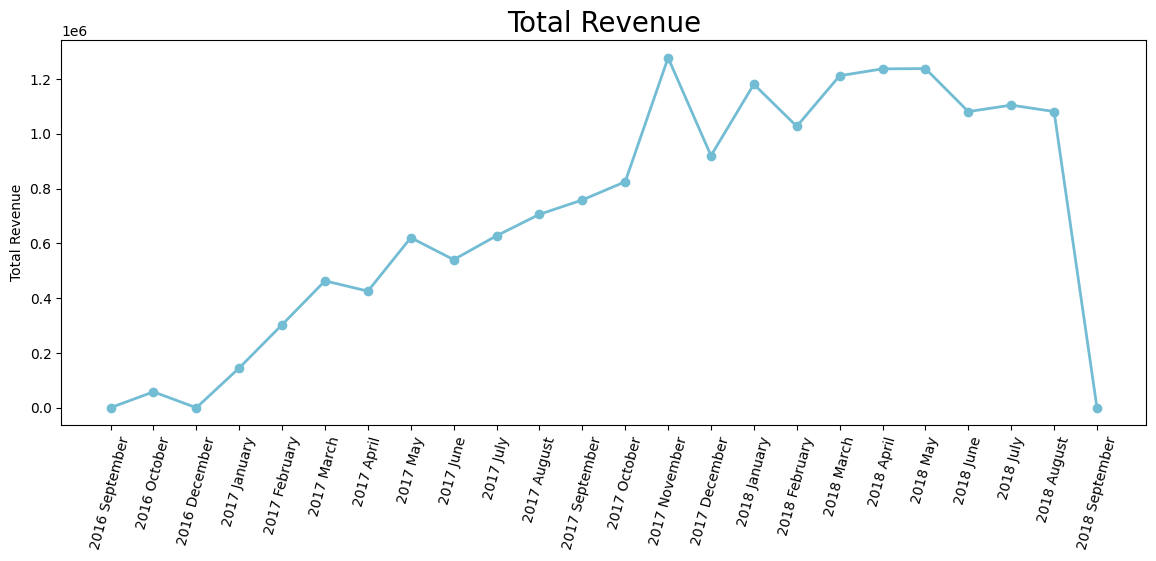

In [101]:
plt.figure(figsize=(14, 5))
plt.plot(
    total_revenue['year_month'],
    total_revenue['payment_value'],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue", loc="center", fontsize=20)
plt.ylabel('Total Revenue')
plt.xticks(rotation=75, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [102]:
total_order = main_df
total_order = total_order.groupby(['year_month','year','month_no','month']).agg({
    "order_id": "count",
}).sort_values(['year','month_no'], ascending=True).reset_index()

total_order.head()

,year_month,year,month_no,month,order_id
0,2016 September,2016,9,September,3
1,2016 October,2016,10,October,335
2,2016 December,2016,12,December,1
3,2017 January,2017,1,January,878
4,2017 February,2017,2,February,1911


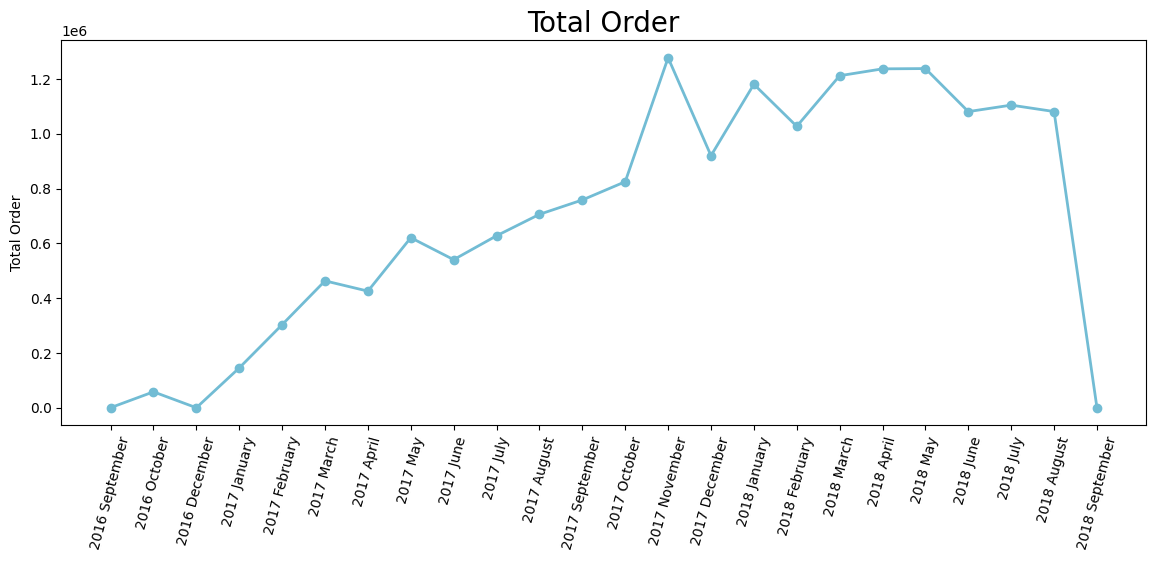

In [103]:
plt.figure(figsize=(14, 5))
plt.plot(
    total_revenue['year_month'],
    total_revenue['payment_value'],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Order", loc="center", fontsize=20)
plt.ylabel('Total Order')
plt.xticks(rotation=75, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## 2. Kategori apa yang paling banyak dan paling sedikit terjual?

In [104]:
sum_order_items_df = main_df.groupby("product_category_name").product_id.count().sort_values(ascending=False).reset_index()
sum_order_items_df = sum_order_items_df.rename(columns={"product_category_name": "category", "product_id": "orders"})
sum_order_items_df

,category,orders
0,bed_bath_table,10712
1,health_beauty,9212
2,sports_leisure,8047
3,computers_accessories,7071
4,furniture_decor,7069
...,...,...
69,portable kitchen food preparers,13
70,cds_dvds_musicals,12
71,pc_gamer,8
72,fashion_childrens_clothes,8


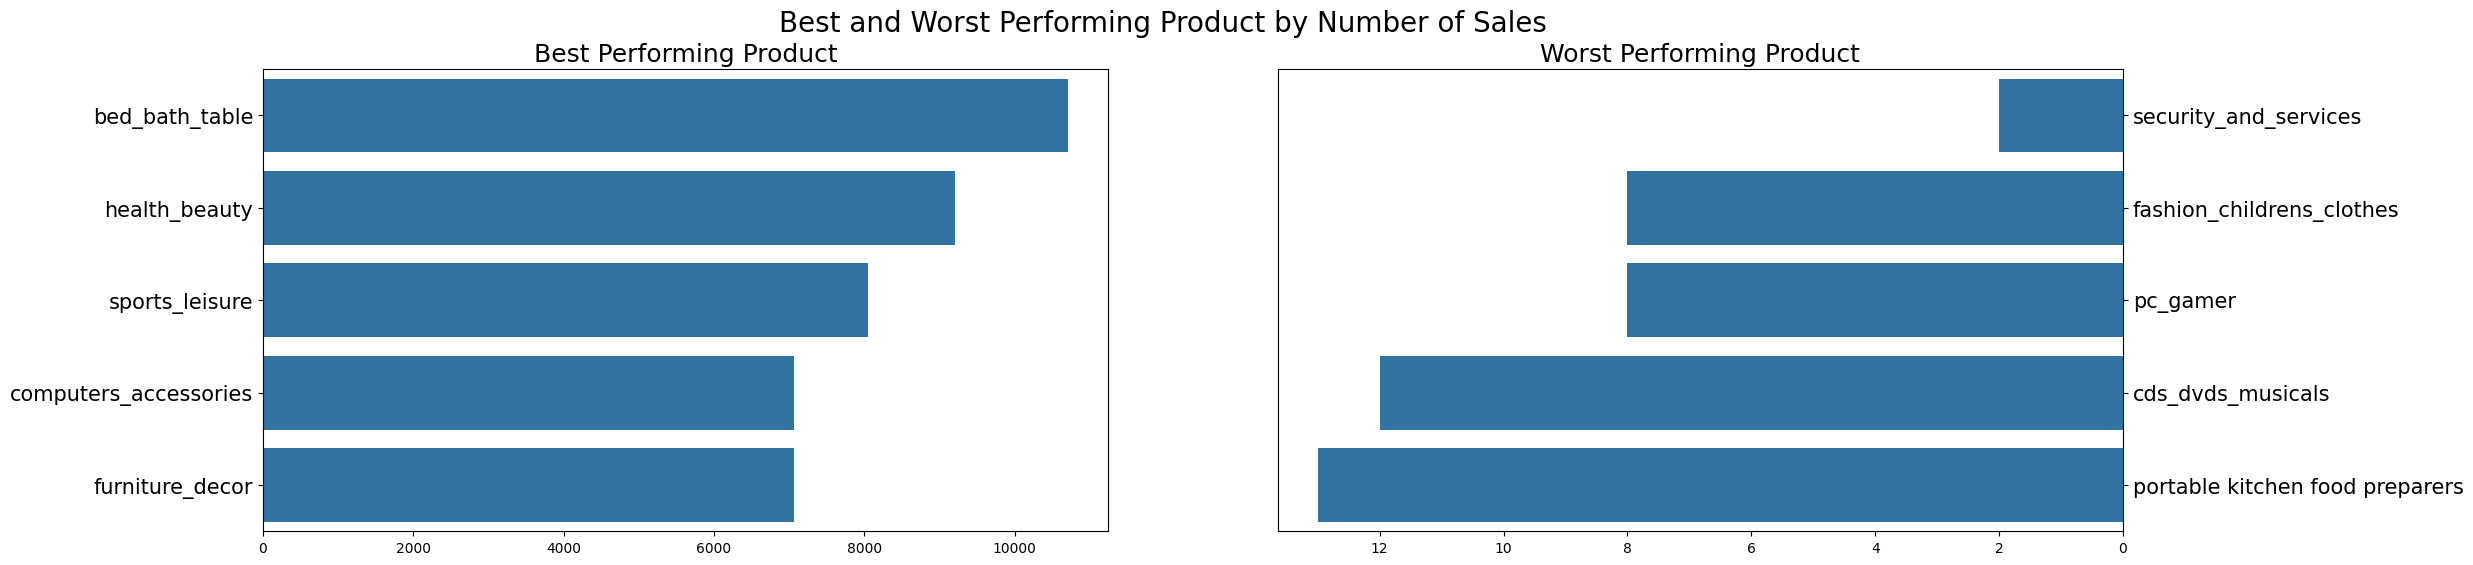

In [105]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

sns.barplot(x="orders", y="category", data=sum_order_items_df.head(5), ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="orders", y="category", data=sum_order_items_df.sort_values(by="orders", ascending=True).head(5), ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

## 3. Metode transaksi yang paling banyak digunakan dan rata-rata payment value-nya?

In [106]:
type_payment = main_df.groupby(['payment_type']).agg({
    "payment_value": "mean",
    "order_id" : "nunique",
}).sort_values(['order_id'], ascending=False).reset_index()
type_payment.head()

,payment_type,payment_value,order_id
0,credit_card,166.426172,76061
1,boleto,149.387324,19689
2,voucher,67.381559,3772
3,debit_card,147.006225,1521


In [107]:
type_payment['payment_type']

0    credit_card
1         boleto
2        voucher
3     debit_card
Name: payment_type, dtype: object

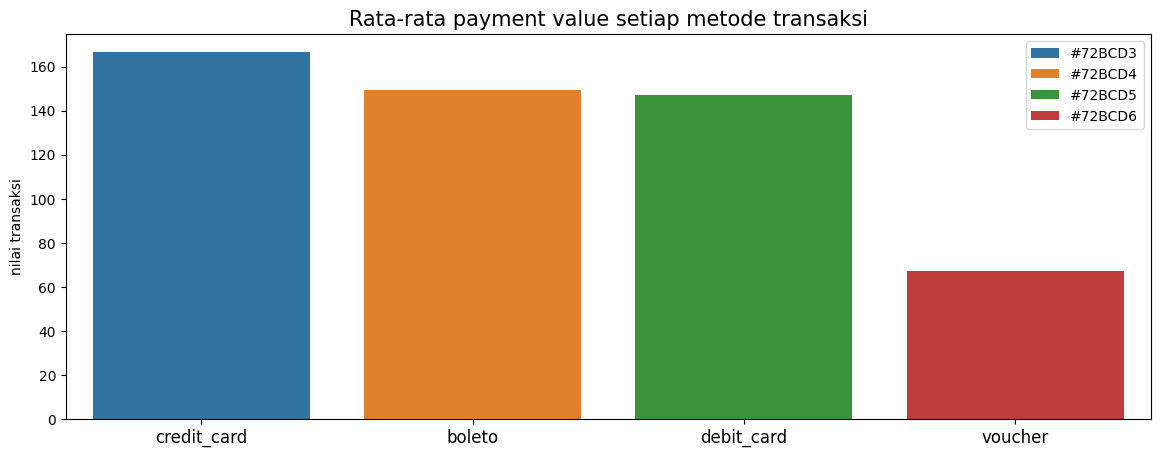

In [108]:
plt.figure(figsize=(14, 5))

colors = ["#72BCD3", "#72BCD4", "#72BCD5", "#72BCD6"]

sns.barplot( 
    x="payment_type",
    y="payment_value",
    data=type_payment.sort_values(by="payment_value", ascending = False),
    hue=colors
)
plt.title("Rata-rata payment value setiap metode transaksi", loc="center", fontsize=15)
plt.ylabel("nilai transaksi")
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

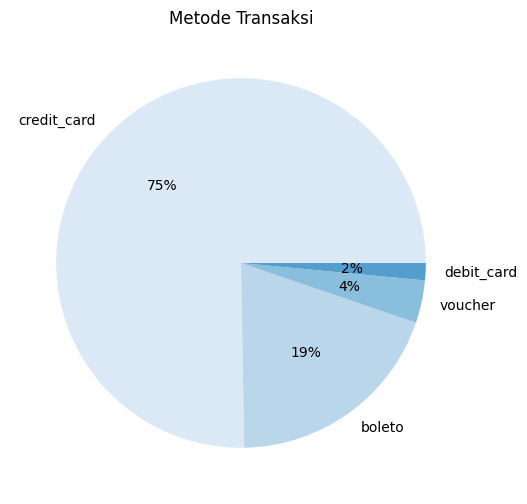

In [109]:
palette_color = sns.color_palette('Blues') 

plt.figure(figsize = (6,6))
plt.pie(type_payment["order_id"], labels=type_payment["payment_type"], colors=palette_color, autopct='%.0f%%')
plt.title("Metode Transaksi")
plt.show()

## 4. Hari apa yang paling sering transaksi?

In [110]:
best_day = main_df.groupby(by="day").order_id.nunique().sort_values(ascending=False).reset_index()
best_day.rename(columns={
    "order_id": "total_orders"
}, inplace=True)
best_day

,day,total_orders
0,Monday,16081
1,Tuesday,15851
2,Wednesday,15456
3,Thursday,14661
4,Friday,14050
5,Sunday,11892
6,Saturday,10825


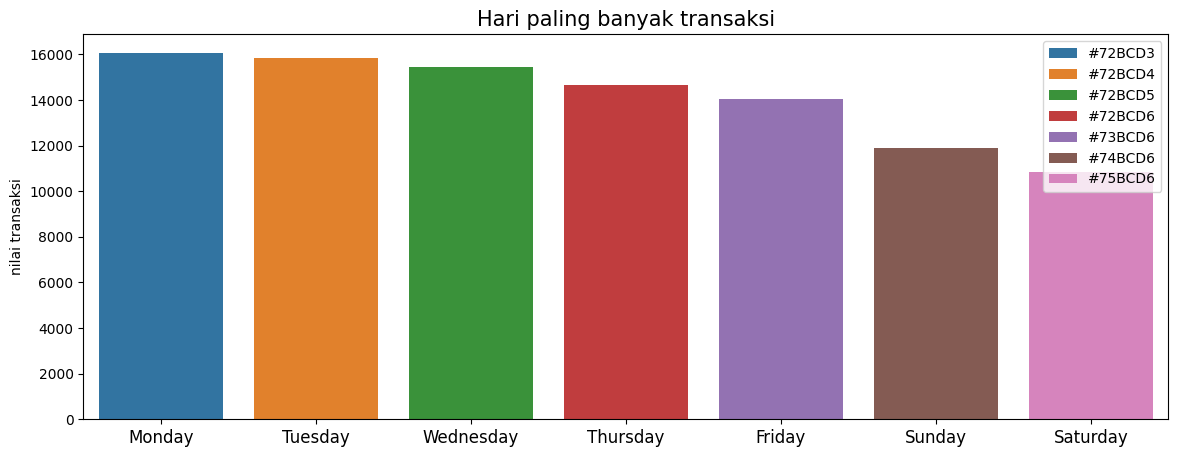

In [111]:
plt.figure(figsize=(14, 5))

colors = ["#72BCD3", "#72BCD4", "#72BCD5", "#72BCD6", "#73BCD6", "#74BCD6", "#75BCD6"]

sns.barplot( 
    x="day",
    y="total_orders",
    data=best_day.sort_values(by="total_orders", ascending = False),
    hue=colors
)
plt.title("Hari paling banyak transaksi", loc="center", fontsize=15)
plt.ylabel("nilai transaksi")
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

# Conclusion

1. <b>Bagaimana performa penjualan dan revenue?</b>
Mulai tahun 2017 sampai 2018 penjualan terus mengalami kenaikan, titik tertingginya ada pada bulan November 2017. Bulan September 2018 mengalami penurunan penjualan yang cukup drastis, hal ini kemungkinan disebabkan karena data yang diterima terakhir update pada bulan September 2018.
2. <b>Kategori apa yang paling banyak dan paling sedikit terjual?</b>
Kategori produk yang paling banyak dibeli adalah bad_bath_table, dan yang paling sedikit dibeli ada pada kategori security_and_services
3. <b>Metode transaksi yang paling banyak digunakan dan rata-rata payment value-nya?</b>
metode pembayaran yang paling banyak digunakan adalah credit card, dan rata-rata payment value nya 166.426172
4. <b>Hari apa yang paling sering transaksi?</b>
Konsumen rata-rata banyak melakukan transaksi pada hari Senin-Jumat

# Export main_df

In [112]:
main_df.to_csv('main_data.csv')

# RFM Analysis

In [113]:
rfm_df = main_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max",
    "order_id": "count",
    "payment_value": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,1,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,1,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,1,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,1,107.01


In [114]:
rfm_df["max_order_timestamp"] = pd.to_datetime(rfm_df["max_order_timestamp"])

In [115]:
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = main_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,1,114.74,293
1,000161a058600d5901f007fab4c27140,2017-07-16,1,67.41,414
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28,1,195.42,552
3,0002414f95344307404f0ace7a26f1d5,2017-08-16,1,179.35,383
4,000379cdec625522490c315e70c7a9fb,2018-04-02,1,107.01,154


In [116]:
rfm_df.sort_values(by="max_order_timestamp", ascending=False).head(5)

,customer_id,max_order_timestamp,frequency,monetary,recency
29100,4b7decb9b58e2569548b8b4c8e20e8d7,2018-09-03,1,166.46,0
33352,56b1ac2855cc6d7950b4ffa6a9b41b0d,2018-08-29,1,119.42,5
28298,496630b6740bcca28fce9ba50d8a26ef,2018-08-29,1,33.23,5
88281,e450a297a7bc6839ceb0cf1a2377fa02,2018-08-29,1,73.10,5
71555,b8c19e70d00f6927388e4f31c923d785,2018-08-29,1,178.25,5


In [117]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,293
1,000161a058600d5901f007fab4c27140,1,67.41,414
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,552
3,0002414f95344307404f0ace7a26f1d5,1,179.35,383
4,000379cdec625522490c315e70c7a9fb,1,107.01,154


In [118]:
rfm_df.describe()

,frequency,monetary,recency
count,98816.000000,98816.000000,98816.000000
mean,1.078176,170.334279,246.167523
std,0.402053,256.847879,153.367007
min,1.000000,0.000000,0.000000
25%,1.000000,62.010000,122.000000
50%,1.000000,106.300000,228.000000
75%,1.000000,182.290000,356.000000
max,25.000000,15978.650000,729.000000


In [119]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_id,frequency,monetary,recency
29100,4b7decb9b58e2569548b8b4c8e20e8d7,1,166.46,0
32423,54365416b7ef5599f54a6c7821d5d290,1,106.95,5
52994,898b7fee99c4e42170ab69ba59be0a8b,1,93.75,5
76247,c4c66f47534e09a03fc7a878a9eda5ea,1,74.21,5
71555,b8c19e70d00f6927388e4f31c923d785,1,178.25,5


In [120]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_id,frequency,monetary,recency
59810,9af2372a1e49340278e7c1ef8d749f34,25,436.08,501
56591,92cd3ec6e2d643d4ebd0e3d6238f69e2,22,58.16,453
51933,86cc80fef09f7f39df4b0dbce48e81cb,20,574.00,423
13752,23924b2105c5376cd6204757c8b68752,20,308.48,276
68990,b246eeed30b362c09d867b9e598bee51,19,36.82,269


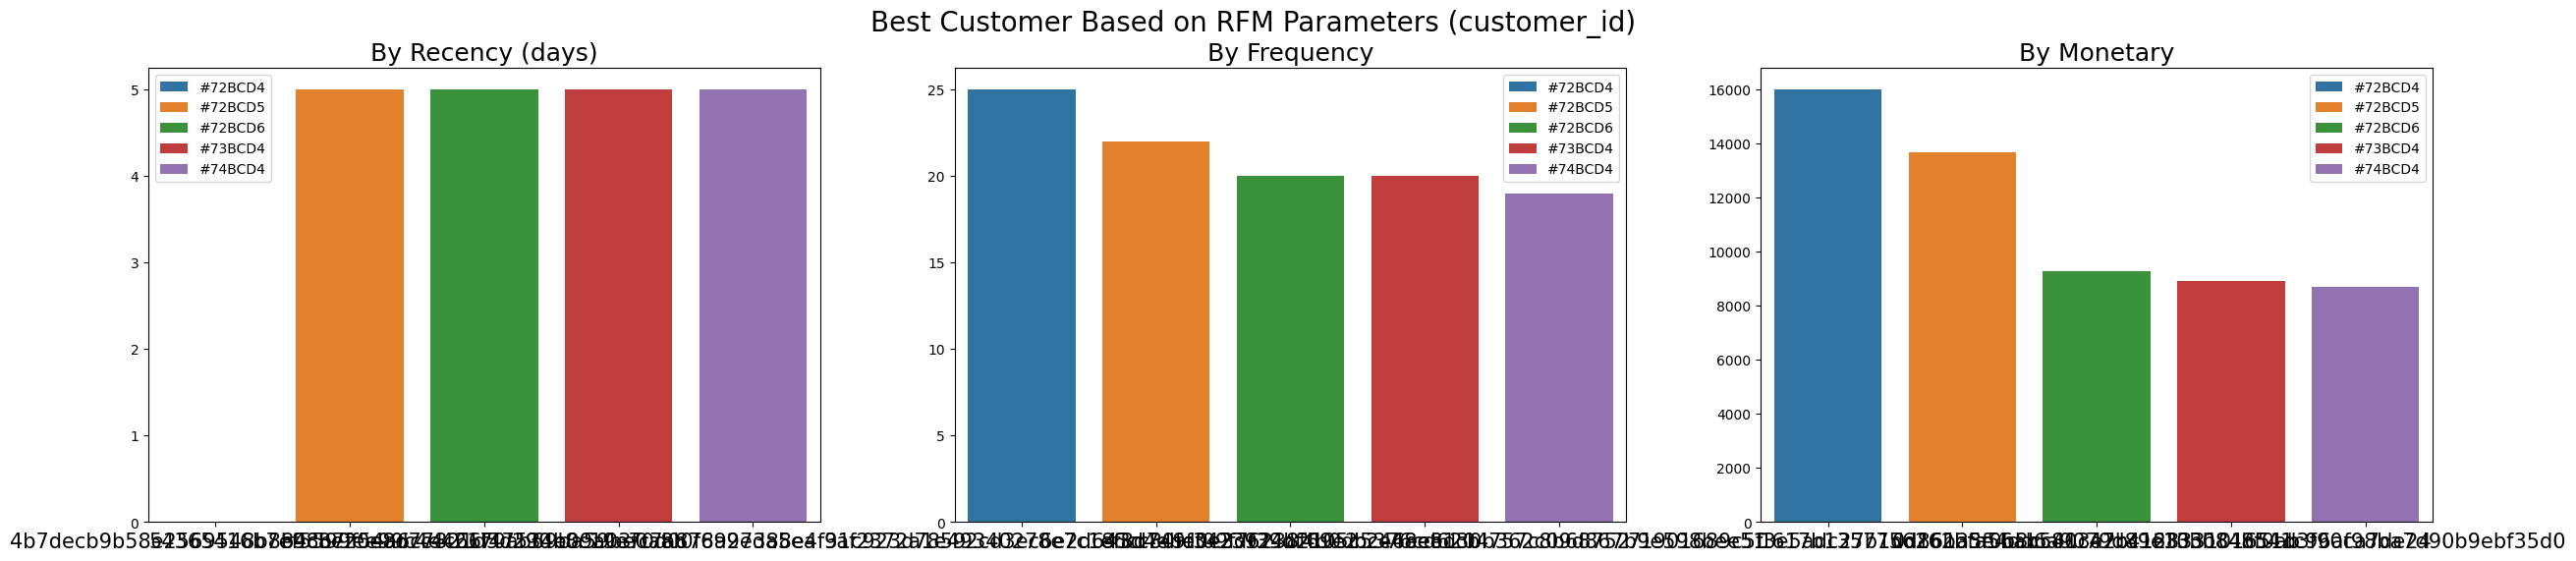

In [121]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD5", "#72BCD6", "#73BCD4", "#74BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), hue=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), hue=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), hue=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

## Mengurutkan customer berdasarkan recency, frequency, & monetary score

In [122]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,293,34101.5,46382.0,53005.5
1,000161a058600d5901f007fab4c27140,1,67.41,414,16715.5,46382.0,28635.0
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,552,2836.5,46382.0,76698.0
3,0002414f95344307404f0ace7a26f1d5,1,179.35,383,20996.0,46382.0,73604.0
4,000379cdec625522490c315e70c7a9fb,1,107.01,154,66562.0,46382.0,49806.5


In [123]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100
 
rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)
 
rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,293,34.510100,46.937743,53.640605
1,000161a058600d5901f007fab4c27140,1,67.41,414,16.915783,46.937743,28.978101
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,552,2.870487,46.937743,77.616985
3,0002414f95344307404f0ace7a26f1d5,1,179.35,383,21.247571,46.937743,74.485913
4,000379cdec625522490c315e70c7a9fb,1,107.01,154,67.359537,46.937743,50.403275


In [124]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'RFM_score']].head(7)

,customer_id,RFM_score
0,00012a2ce6f8dcda20d059ce98491703,2.44
1,000161a058600d5901f007fab4c27140,1.61
2,0001fd6190edaaf884bcaf3d49edf079,2.89
3,0002414f95344307404f0ace7a26f1d5,2.94
4,000379cdec625522490c315e70c7a9fb,2.60
5,0004164d20a9e969af783496f3408652,1.61
6,000419c5494106c306a97b5635748086,1.59


## Segmentasi customer berdasarkan RFM_score

In [125]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_id', 'RFM_score', 'customer_segment']].head(20)

,customer_id,RFM_score,customer_segment
0,00012a2ce6f8dcda20d059ce98491703,2.44,Low value customers
1,000161a058600d5901f007fab4c27140,1.61,Low value customers
2,0001fd6190edaaf884bcaf3d49edf079,2.89,Low value customers
3,0002414f95344307404f0ace7a26f1d5,2.94,Low value customers
4,000379cdec625522490c315e70c7a9fb,2.60,Low value customers
5,0004164d20a9e969af783496f3408652,1.61,Low value customers
6,000419c5494106c306a97b5635748086,1.59,lost customers
7,00046a560d407e99b969756e0b10f282,3.02,Medium value customer
8,00050bf6e01e69d5c0fd612f1bcfb69c,1.98,Low value customers
9,000598caf2ef4117407665ac33275130,4.21,High value customer


In [126]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High value customer,3097
1,Low value customers,48006
2,Medium value customer,27532
3,Top customers,1021
4,lost customers,19160


In [127]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

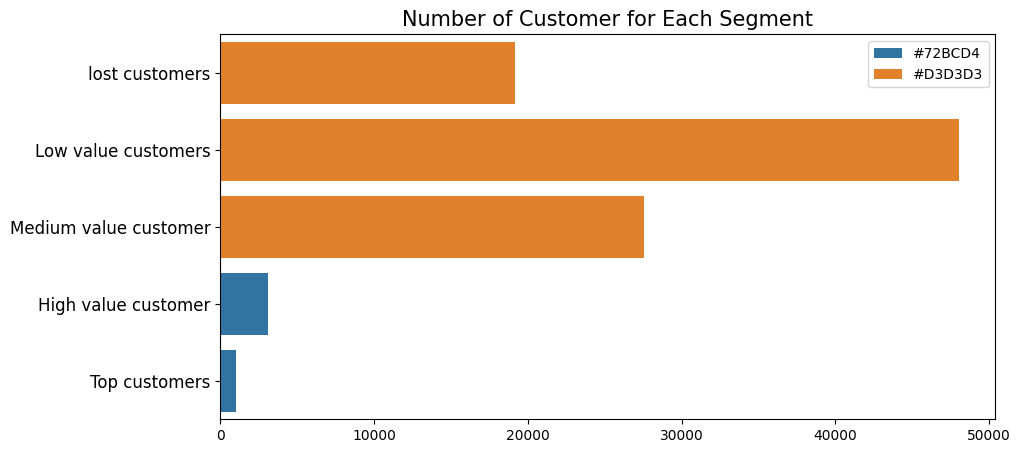

In [128]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_id", 
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    hue=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()